In [15]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [16]:
columns = [
    'checking_account', 'duration', 'credit_history', 'purpose', 'credit_amount',
    'savings_account', 'employment', 'installment_rate', 'personal_status_sex',
    'other_debtors', 'residence_since', 'property', 'age', 'other_installment_plans',
    'housing', 'existing_credits', 'job', 'dependents', 'telephone', 'foreign_worker', 'class'
]

df = pd.read_csv('../dataset/german.txt', sep=' ', header=None, names=columns)

df['class'] = df['class'].map({1: 0, 2: 1})

categorical_columns = [
    'checking_account', 'credit_history', 'purpose', 'savings_account',
    'employment', 'personal_status_sex', 'other_debtors', 'property',
    'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'
]

numerical_columns = [
    'duration', 'credit_amount', 'installment_rate', 'residence_since',
    'age', 'existing_credits', 'dependents'
]

In [17]:
print(df)

    checking_account  duration credit_history purpose  credit_amount  \
0                A11         6            A34     A43           1169   
1                A12        48            A32     A43           5951   
2                A14        12            A34     A46           2096   
3                A11        42            A32     A42           7882   
4                A11        24            A33     A40           4870   
..               ...       ...            ...     ...            ...   
995              A14        12            A32     A42           1736   
996              A11        30            A32     A41           3857   
997              A14        12            A32     A43            804   
998              A11        45            A32     A43           1845   
999              A12        45            A34     A41           4576   

    savings_account employment  installment_rate personal_status_sex  \
0               A65        A75                 4               

In [18]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [19]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [20]:
print(df)

     checking_account  duration  credit_history  purpose  credit_amount  \
0                   0 -1.236478               4        4      -0.745131   
1                   1  2.248194               2        4       0.949817   
2                   3 -0.738668               4        7      -0.416562   
3                   0  1.750384               2        3       1.634247   
4                   0  0.256953               3        0       0.566664   
..                ...       ...             ...      ...            ...   
995                 3 -0.738668               2        3      -0.544162   
996                 0  0.754763               2        1       0.207612   
997                 3 -0.738668               2        4      -0.874503   
998                 0  1.999289               2        4      -0.505528   
999                 1  1.999289               4        1       0.462457   

     savings_account  employment  installment_rate  personal_status_sex  \
0                  4    

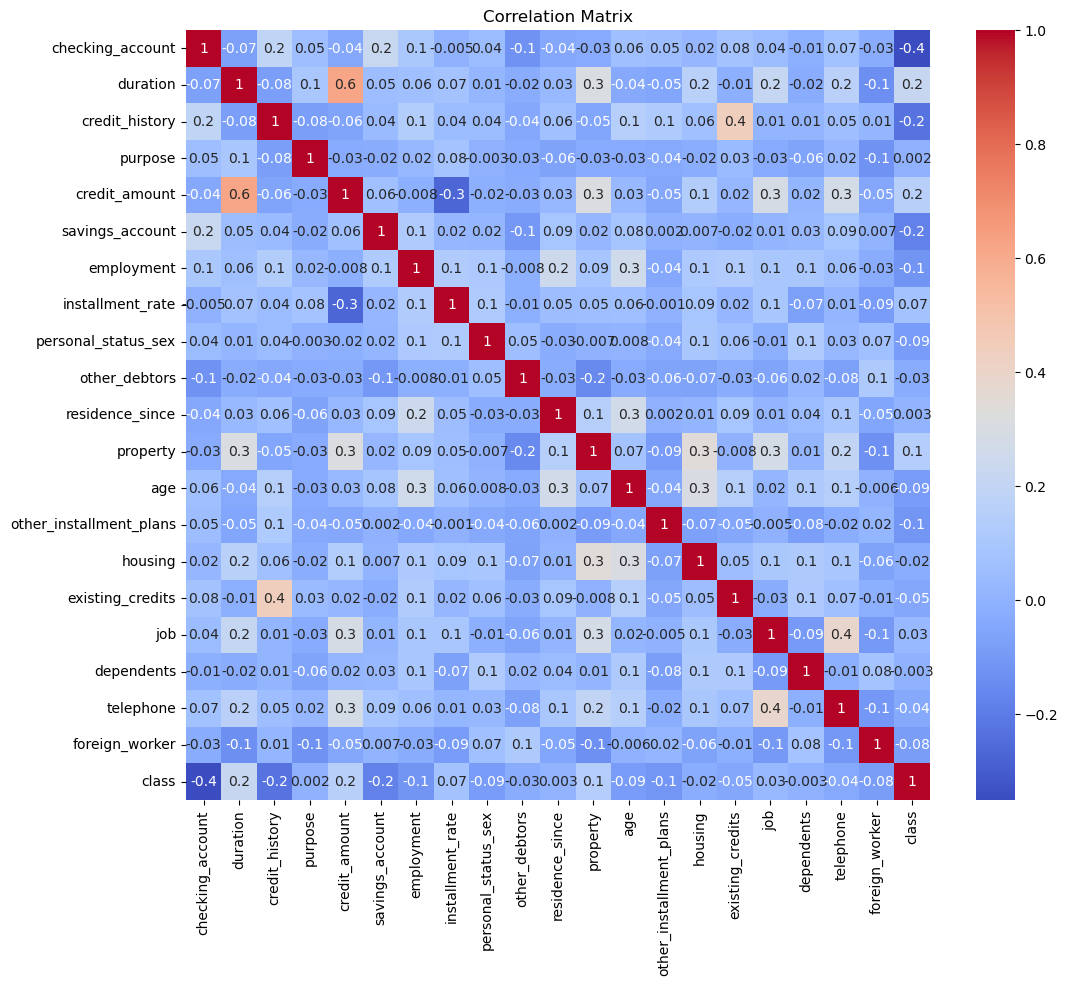

In [21]:
plt.figure(figsize=(12, 10))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1g")
plt.title('Correlation Matrix')
plt.show()

dropped:


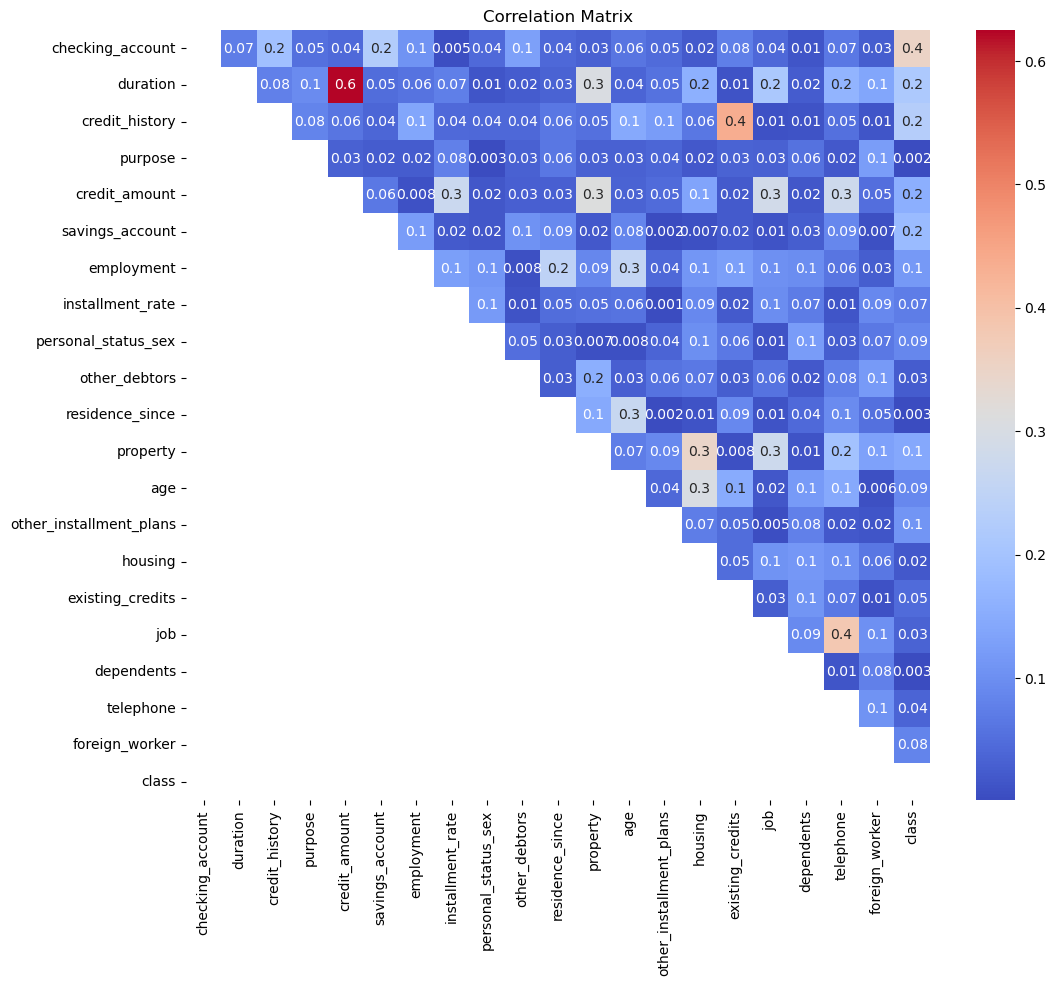

In [22]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("dropped:")
for column in to_drop:
    print(column)
# Drop highly correlated features
df = df.drop(to_drop, axis=1)
plt.figure(figsize=(12, 10))
sb.heatmap(upper, annot=True, cmap='coolwarm', fmt=".1g")
plt.title('Correlation Matrix')
plt.show()

In [23]:
y = df['class']
df = df.drop('class', axis=1)
x = df.values

In [24]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

In [25]:
importances = model.feature_importances_
res = {}
for i, col in enumerate(df.columns):
    res[col] = importances[i]
sorted_res = sorted(res.items(), key=lambda x: x[1], reverse=True)
for i in range(len(sorted_res)):
    sorted_res[i] = (sorted_res[i][0], round(sorted_res[i][1], 4))
print("Feature importances:")
for name, value in sorted_res:
    print(f"{name}: {value}")

Feature importances:
credit_amount: 0.1689
checking_account: 0.1159
age: 0.1129
duration: 0.091
purpose: 0.0851
employment: 0.0551
credit_history: 0.0547
residence_since: 0.0476
property: 0.0476
savings_account: 0.0425
job: 0.0296
telephone: 0.0259
other_installment_plans: 0.0256
installment_rate: 0.0231
personal_status_sex: 0.0178
existing_credits: 0.0164
other_debtors: 0.0114
housing: 0.0114
foreign_worker: 0.0092
dependents: 0.0082
